In [1]:

from __future__ import print_function
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = 10, 8
plt.rc('xtick', labelsize='x-large')
plt.rc('font', size=15, weight='normal')
plt.rc('ytick', labelsize='x-large')
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.labelweight"] = 'normal'
plt.rcParams["lines.markersize"] = 10
plt.rc('xtick.major',size=3,width=3)
plt.rc('ytick.major',size=3,width=3)
plt.rc('xtick.minor',visible=True,size=3,width=1)
plt.rc('ytick.minor',visible=True,size=3,width=1)



plt.rcParams['savefig.dpi'] = 200

In [2]:
import pandas as pd

import obspy
from obspy import read, read_inventory
from obspy.signal import PPSD
import numpy as np

In [3]:
from obspy.core import read, UTCDateTime
from obspy.clients.arclink import Client
from obspy import UTCDateTime, Stream, read
from obspy.geodetics.base import gps2dist_azimuth
from obspy.core.util import AttribDict
import matplotlib
import matplotlib as mpl
new_style = {'grid': False}
mpl.rc('axes', **new_style)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from obspy import read_events
from obspy import read
import obspy
from obspy.signal.trigger import classic_sta_lta
from obspy.core import read
from obspy import read, read_inventory
from obspy.signal.trigger import recursive_sta_lta, trigger_onset


E:\Users\baptiste\anaconda3\lib\site-packages\obspy\clients\arclink\__init__.py:178: ObsPyDeprecationWarning: The ArcLink protocol will be deprecated in the near future. Please, use the client contacting the routing service provided by EIDA: https://docs.obspy.org/packages/obspy.clients.fdsn.html#basic-routing-clients-usage
  warnings.warn(msg, category=ObsPyDeprecationWarning)


In [5]:
import matplotlib
%matplotlib inline

In [4]:
pd.options.display.max_rows = 9999
pd.options.display.max_columns = 9999

In [5]:
df_HHZ = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS_HHZ_PSD_minimum_noise_PER_MS_for_2017.csv', index_col=['0_y'])
df_HHE = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS_HHE_PSD_minimum_noise_PER_MS_for_2017.csv', index_col=['0_y'])
df_HHN = pd.read_csv('CSV/NoiseAndWindSpeed/ELIS_HHN_PSD_minimum_noise_PER_MS_for_2017.csv', index_col=['0_y'])
#df_HHN = df_HHN.drop(columns=['8ms', '5ms'])

Text(0.5, 1.0, '2017 ELIS HHZ Wind Noise')

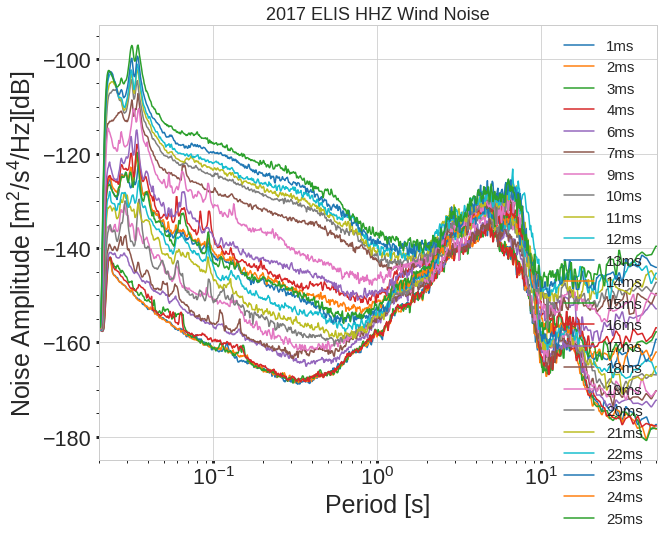

In [20]:
df_HHE.plot()
plt.semilogx()
plt.ylabel('Noise Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]', weight='normal')
plt.xlabel('Period [s]')
plt.title('2017 ELIS HHZ Wind Noise')

AttributeError: 'list' object has no attribute 'get_array'

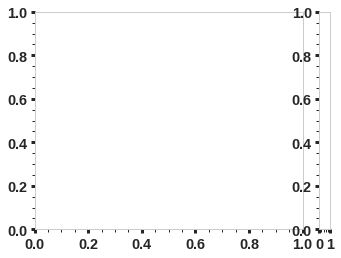

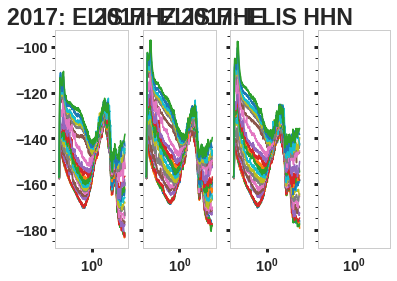

In [8]:
fig = plt.figure()

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, sharex=True, squeeze=True)

#def get_axis_limits(ax, scale=.75):
    #return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*.2

#ax1


ax1.plot(df_HHZ)

ax1.set_xscale('log')

ax1.set_title('2017: ELIS HHZ', size=23, weight="bold")


#ax2

ax2.plot(df_HHE)

ax2.set_xscale('log')

ax2.set_title('2017: ELIS HHE', size=23, weight="bold")



#ax3

ax3.plot(df_HHN)

ax3.set_xscale('log')

ax3.set_title('2017: ELIS HHN', size=23, weight="bold")



#ax4


WS = [1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

cbar = fig.colorbar(WS)

ax1_bis = ax1.twinx()
ax1_bis.tick_params(top=False,which="both", bottom=False, left=False, right=False, labelleft=False,labelright=False)

ax2_bis = ax2.twinx()
ax2_bis.tick_params(top=False,which="both", bottom=False, left=False, right=False, labelleft=False,labelright=False)

ax3_bis = ax3.twinx()
ax3_bis.tick_params(top=False,which="both", bottom=False, left=False, right=False, labelleft=False,labelright=False)


plt.tight_layout()


#plt.savefig('WindSpeed_Vs_SeismicTrace_with_space.04.09.2019_with_annotation.jpg')
    

<Figure size 864x576 with 0 Axes>

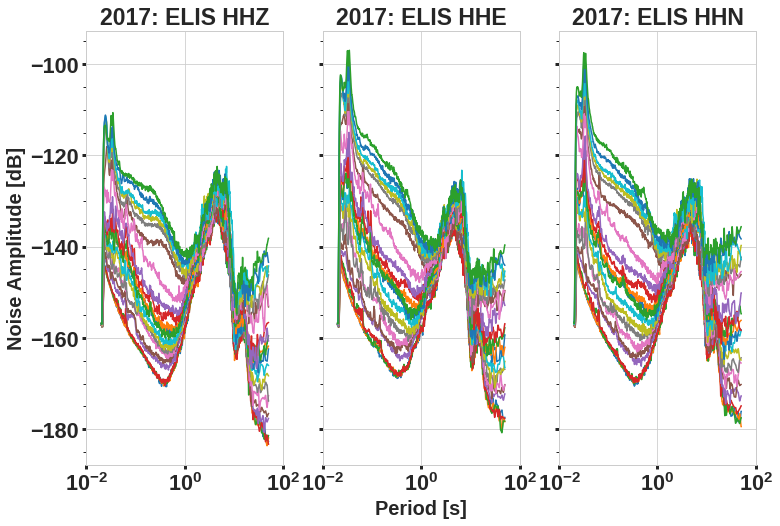

In [38]:
fig = plt.figure()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, squeeze=True)


#ax1


ax1.plot(df_HHZ)

ax1.set_xscale('log')

ax1.set_title('2017: ELIS HHZ', size=23, weight="bold")


ax1.set_ylabel('Noise Amplitude [dB]')

ax1.set_xlim([0.01, 100])



ax2.plot(df_HHE)

ax2.set_xscale('log')

ax2.set_title('2017: ELIS HHE', size=23, weight="bold")
ax2.set_xlabel('Period [s]')

ax3.plot(df_HHN)

ax3.set_xscale('log')

ax3.set_title('2017: ELIS HHN', size=23, weight="bold")


fig.tight_layout()
plt.show()



<Figure size 864x576 with 0 Axes>

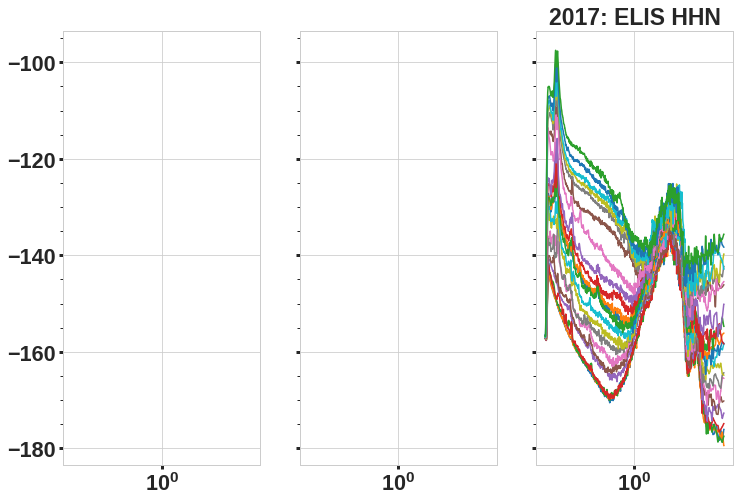

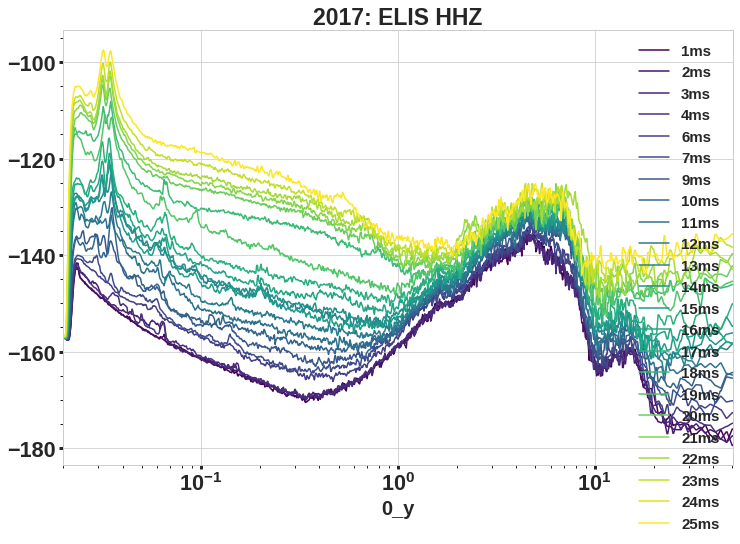

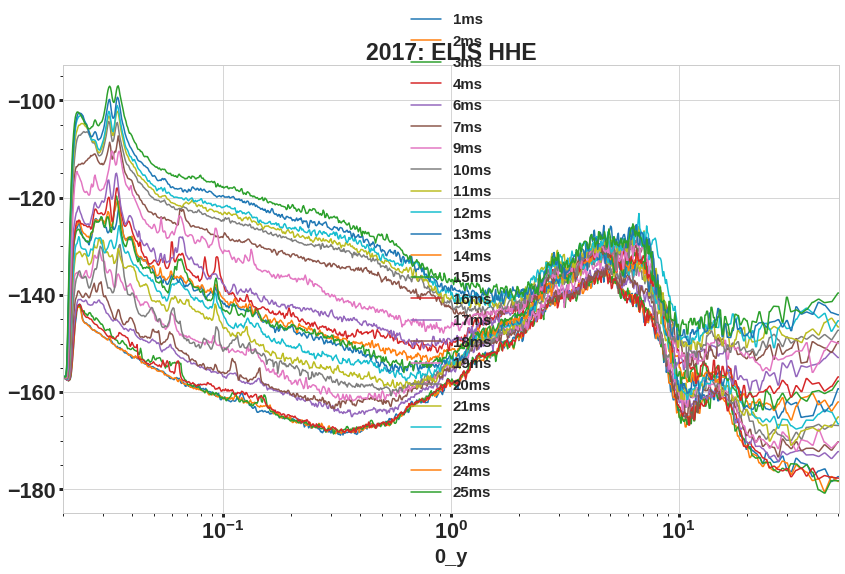

In [40]:
fig = plt.figure()

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, squeeze=True)

def get_axis_limits(ax, scale=.75):
    return ax.get_xlim()[1]*scale, ax.get_ylim()[1]*.2

#ax1


ax1 = df_HHN.plot(colormap='viridis')
plt.semilogx()#plot(df_HHZ)

ax1.set_xscale('log')

ax1.set_title('2017: ELIS HHZ', size=23, weight="bold")


#ax2

ax2 = df_HHE.plot()

ax2.set_xscale('log')

ax2.set_title('2017: ELIS HHE', size=23, weight="bold")



#ax3

ax3.plot(df_HHN)

ax3.set_xscale('log')

ax3.set_title('2017: ELIS HHN', size=23, weight="bold")






plt.tight_layout()


#plt.savefig('WindSpeed_Vs_SeismicTrace_with_space.04.09.2019_with_annotation.jpg')
    

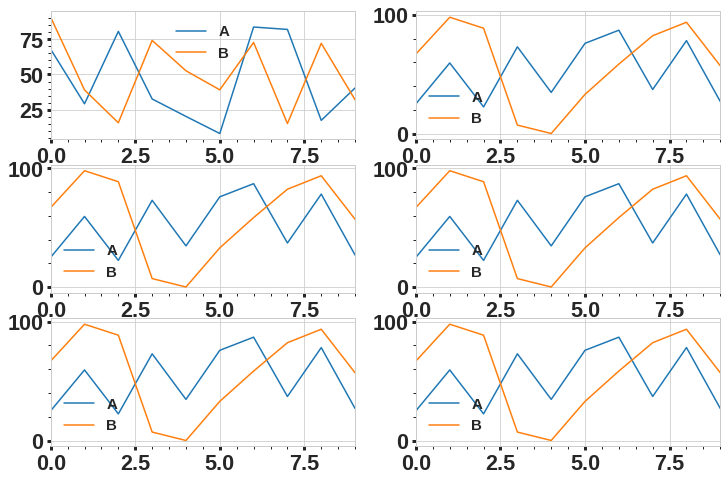

In [47]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# dataframe sample data
df1 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df2 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df3 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df4 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df5 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
df6 = pd.DataFrame(np.random.rand(10,2)*100, columns=['A', 'B'])
#define number of rows and columns for subplots
nrow=3
ncol=2
# make a list of all dataframes 
df_list = [df1 ,df2, df3, df4, df5, df6]
fig, axes = plt.subplots(nrow, ncol)
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot(ax=axes[r,c])
        count=+1

In [83]:
df_HHZ.columns

Index(['1ms', '2ms', '3ms', '4ms', '6ms', '7ms', '9ms', '10ms', '11ms', '12ms',
       '13ms', '14ms', '15ms', '16ms', '17ms', '18ms', '19ms', '20ms', '21ms',
       '22ms', '23ms', '24ms', '25ms'],
      dtype='object')

Text(0, 0.5, 'Noise Amplitude [dB]')

<Figure size 3600x576 with 0 Axes>

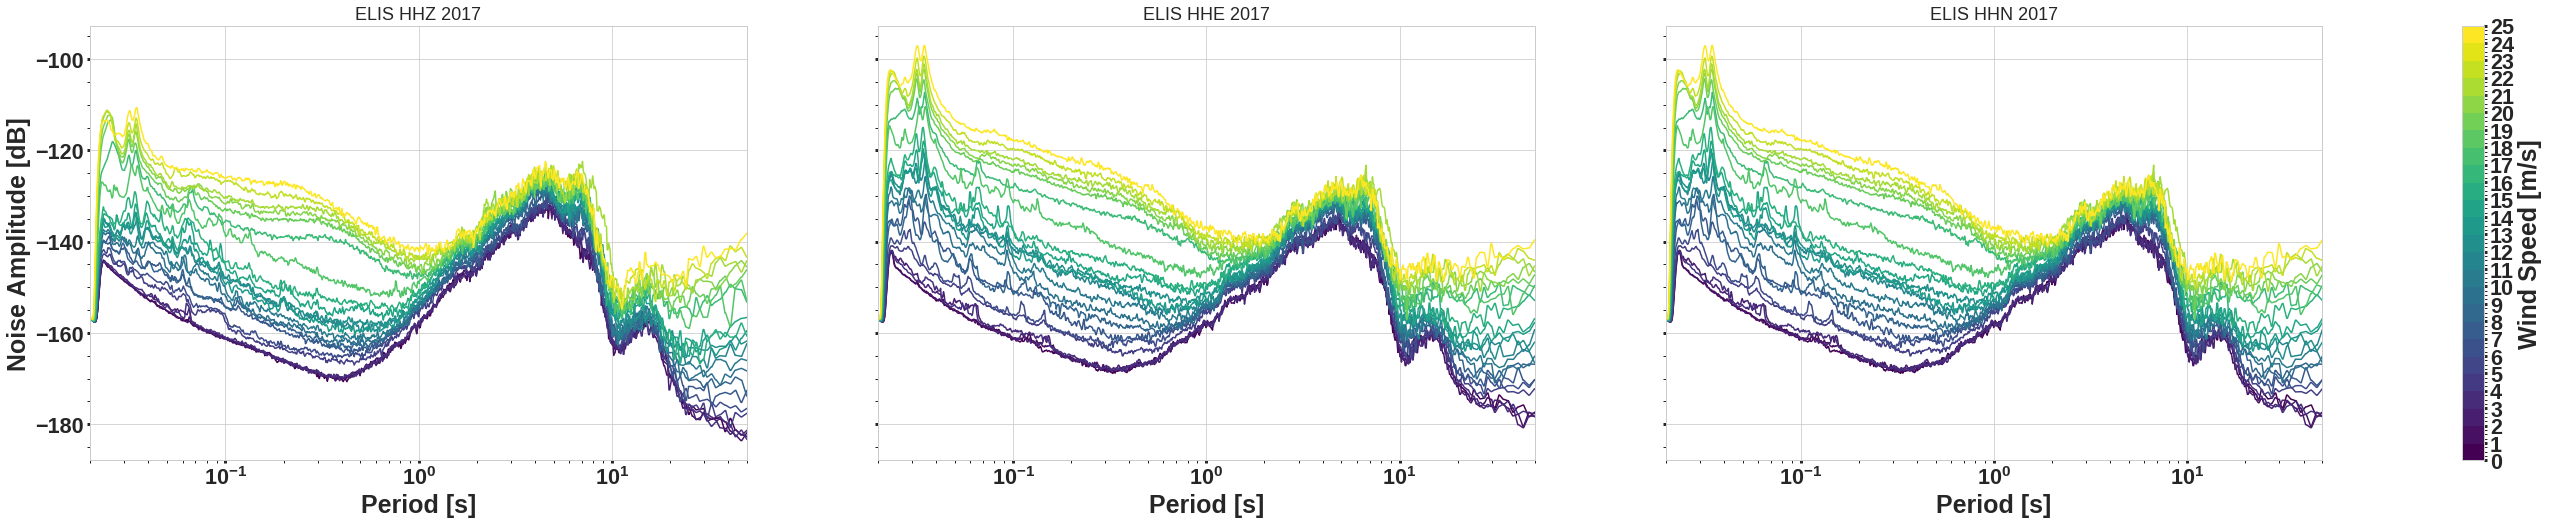

In [121]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import ScalarMappable
# dataframe sample data
#define number of rows and columns for subplots

fig = plt.figure()

ncol=3
# make a list of all dataframes 
df_list = [df_HHZ ,df_HHE, df_HHN]
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True, squeeze=True)

cmap = plt.get_cmap("viridis")

WS = [1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]


# define the bins and normalize
bounds = np.linspace(0, 25, 26)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# plot counter
name = [' HHZ ', ' HHE ', ' HHN ']
count=0
for c in range(ncol):
    df_list[count].plot(ax=axes[c], colormap='viridis', logx=True, legend=False)
    axes[c].set_xlabel('Period [s]')
    axes[c].set_xlim([0.02,50])
    axes[c].set_title('ELIS' + name[c] + '2017')
    count=+1
    
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[:3], ticks=bounds, boundaries=bounds)
cbar.ax.set_ylabel("Wind Speed [m/s]")
axes[0].set_ylabel('Noise Amplitude [dB]')

#plt.savefig('PNG/WindSpeed_every_components.09.012.2019.jpg')


In [15]:
df_HHZ

1ms         2ms         3ms         4ms         6ms  \
0_y                                                                     
0.020000  -157.119324 -157.214706 -157.198898 -157.083633 -157.075378   
0.020174  -157.045761 -157.061417 -157.044327 -157.050201 -157.060471   
0.020350  -157.128876 -157.147644 -157.152283 -157.183151 -157.175034   
0.020527  -157.307419 -157.360458 -157.294159 -157.301971 -157.286591   
0.020705  -157.391312 -157.417282 -157.470535 -157.438629 -157.451141   
0.020885  -157.518616 -157.585724 -157.523987 -157.545471 -157.546616   
0.021067  -157.665665 -157.635544 -157.625305 -157.619095 -157.613724   
0.021251  -157.585648 -157.539749 -157.580551 -157.521332 -157.638672   
0.021435  -157.385468 -157.243195 -157.205566 -157.314423 -156.962311   
0.021622  -156.521332 -156.558792 -156.395721 -156.427856 -155.357925   
0.021810  -155.080124 -155.136765 -154.872269 -154.748657 -152.968689   
0.022000  -153.078033 -153.073456 -152.738800 -152.586517 -150.803604   
0.022191  -150.961365 -150.856491 -150.513138 -150.535507 -148.746338   
0.022384  -148.971970 -148.706696 -148.649475 -148.349335 -147.018707   
0.022579  -147.243317 -147.130249 -146.995224 -146.667114 -145.377472   
0.022776  -145.991776 -145.889496 -145.852264 -145.583084 -144.338531   
0.022974  -145.037247 -145.105896 -144.868042 -144.948380 -143.620316   
0.023174  -144.396729 -144.580536 -144.494736 -144.467407 -143.027466   
0.023376  -144.043503 -144.562576 -144.539291 -144.361908 -142.750427   
0.023579  -144.151535 -144.547699 -144.362045 -144.377426 -142.692261   
0.023784  -144.255402 -144.601807 -144.457458 -144.369949 -142.772339   
0.023991  -144.670761 -144.836960 -144.762833 -144.445938 -142.954437   
0.024200  -145.005875 -145.086319 -144.875885 -144.684708 -143.014847   
0.024410  -145.221664 -145.373566 -144.947586 -144.742584 -143.247360   
0.024623  -145.499191 -145.551163 -145.079239 -144.779419 -143.304565   
0.024837  -145.608643 -145.604965 -145.173691 -144.938675 -143.058456   
0.025053  -145.591705 -145.606445 -145.336868 -145.158875 -142.841599   
0.025271  -145.711273 -145.826508 -145.279785 -145.296341 -142.729080   
0.025491  -146.020645 -146.093109 -145.332779 -145.340515 -143.060913   
0.025713  -146.103958 -146.234665 -145.509018 -145.337219 -143.643951   
0.025937  -146.343246 -146.244324 -145.885422 -145.527420 -144.140640   
0.026162  -146.449188 -146.371872 -146.229507 -145.828339 -144.553070   
0.026390  -146.595520 -146.647766 -146.538803 -145.998352 -144.911224   
0.026620  -146.780014 -146.798141 -146.763016 -146.084595 -144.794128   
0.026851  -146.904770 -146.840958 -146.791382 -146.220230 -144.930115   
0.027085  -147.077301 -146.881012 -146.898178 -146.370041 -144.942520   
0.027321  -147.251541 -147.082916 -147.091690 -146.568130 -144.505920   
0.027559  -147.289520 -147.340134 -147.247009 -146.801941 -145.004730   
0.027798  -147.402344 -147.485535 -147.363449 -147.014084 -145.398117   
0.028040  -147.612152 -147.454178 -147.431793 -147.185181 -145.260376   
0.028284  -147.759125 -147.597839 -147.553604 -147.234055 -145.319763   
0.028530  -147.791519 -147.899261 -147.247849 -147.355499 -145.458054   
0.028779  -147.989136 -148.062927 -147.266876 -147.399597 -145.349457   
0.029029  -148.127136 -148.076904 -147.544342 -147.587662 -145.309357   
0.029282  -148.259842 -148.167175 -147.621994 -147.912125 -145.086975   
0.029537  -148.403015 -148.302902 -147.654449 -147.910828 -144.842194   
0.029794  -148.561157 -148.438766 -147.883316 -147.955902 -144.769760   
0.030053  -148.695648 -148.774048 -148.206512 -148.081970 -144.954636   
0.030314  -148.789459 -148.772400 -148.377686 -148.206467 -145.468918   
0.030578  -148.840042 -148.857849 -148.272476 -148.352875 -146.286774   
0.030844  -148.868393 -149.052032 -148.298859 -148.392715 -146.905731   
0.031113  -149.082870 -149.149872 -148.627991 -148.554321 -147.211533   
0.031383  -149.297424 -149.194595 -148.778168 -148.742142 -147.297318   
0.0

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import ScalarMappable
# dataframe sample data
#define number of rows and columns for subplots

fig = plt.figure()

ncol=3
# make a list of all dataframes 
df_list = [df_HHZ ,df_HHE, df_HHN]
fig, axes = plt.subplots(3, 1, sharey=True, sharex=True, squeeze=True)

cmap = plt.get_cmap("viridis")

#WS = [1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
WS = [1,3,6,9,11,13,15,17,19,21,23,25]

# define the bins and normalize
bounds = np.linspace(0, 25, 26)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# plot counter
name = [' HHZ ', ' HHE ', ' HHN ']
count=0
for c in range(ncol):
    df_list[count].plot(ax=axes[c], colormap='viridis', logx=True, legend=False)
    axes[c].set_xlabel('Period [s]')
    axes[c].set_xlim([0.02,50])
    axes[c].set_title('ELIS' + name[c] + '2017')
    count=+1
    
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[:3], ticks=bounds, boundaries=bounds)
cbar.ax.set_ylabel("Wind Speed [m/s]")
axes[1].set_ylabel('Noise Amplitude [dB (m/$s^2$) $^2$/Hz]'')

#plt.savefig('PNG/WindSpeed_every_components.17.01.2020.jpg')


SyntaxError: EOL while scanning string literal (<ipython-input-16-f846524e9575>, line 37)

<Figure size 720x576 with 0 Axes>

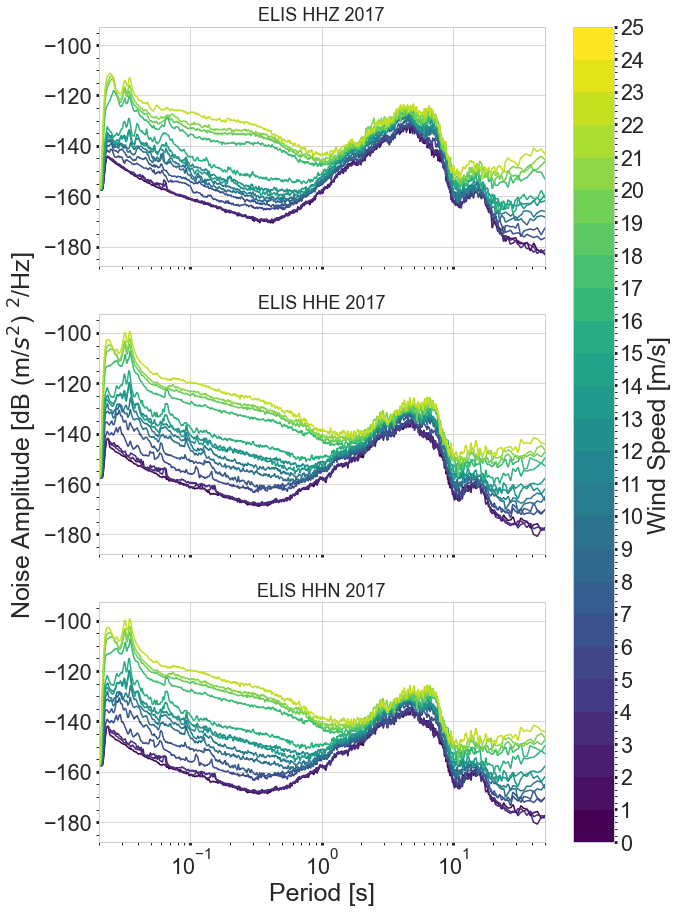

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import ScalarMappable
# dataframe sample data
#define number of rows and columns for subplots

fig = plt.figure()

ncol=3
# make a list of all dataframes 
df_list = [df_HHZ ,df_HHE, df_HHN]
fig, axes = plt.subplots(3, 1, sharey=True, sharex=True, squeeze=True, figsize=(10,15))

cmap = plt.get_cmap("viridis")

WS = [1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
#WS = [1,3,6,9,11,13,15,17,19,21,23,25]

# define the bins and normalize
bounds = np.linspace(0, 25, 26)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# plot counter
name = [' HHZ ', ' HHE ', ' HHN ']
count=0
for c in range(ncol):
    df_list[count].plot(ax=axes[c], colormap='viridis', logx=True, legend=False, grid=True)
    axes[c].set_xlabel('Period [s]')
    axes[c].set_xlim([0.02,50])
    axes[c].set_title('ELIS' + name[c] + '2017')
    count=+1
    
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[:3], ticks=bounds, boundaries=bounds)
cbar.ax.set_ylabel("Wind Speed [m/s]")
axes[1].set_ylabel('Noise Amplitude [dB (m/$s^2$) $^2$/Hz]')

for i in range(1, 17, 2):
    del axes[0].lines[i]
    del axes[1].lines[i]
    del axes[2].lines[i]


plt.savefig('Fig2_WindSpeed_every_components_1of2_WS.14.08.2021.jpg')


In [77]:
for i in range(1, 17, 2):
    print(i)

1
3
5
7
9
11
13
15


In [67]:
axes[0].lines[3]

In [47]:
len(axes[2].lines)

23

<Figure size 720x576 with 0 Axes>

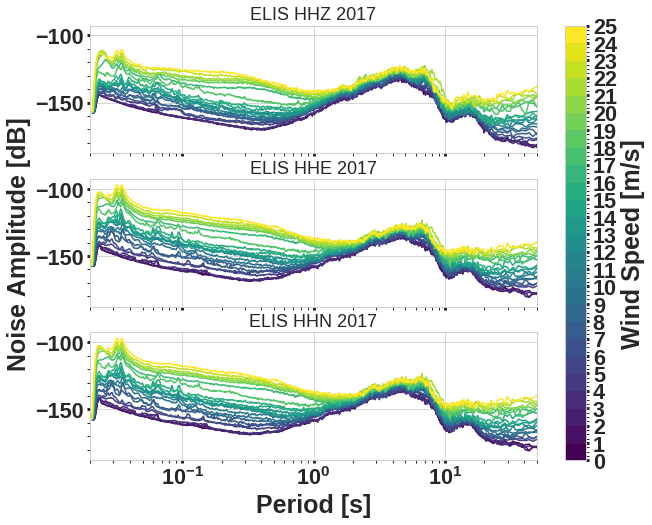

In [128]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.cm import ScalarMappable
# dataframe sample data
#define number of rows and columns for subplots

fig = plt.figure()

ncol=3
# make a list of all dataframes 
df_list = [df_HHZ ,df_HHE, df_HHN]
fig, axes = plt.subplots(3, 1, sharey=True, sharex=True, squeeze=True)

cmap = plt.get_cmap("viridis")

WS = [1,2,3,4,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]


# define the bins and normalize
bounds = np.linspace(0, 25, 26)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# plot counter
name = [' HHZ ', ' HHE ', ' HHN ']
count=0
for c in range(ncol):
    df_list[count].plot(ax=axes[c], colormap='viridis', logx=True, legend=False)
    axes[c].set_xlabel('Period [s]')
    axes[c].set_xlim([0.02,50])
    axes[c].set_title('ELIS' + name[c] + '2017')
    count=+1
    
sm =  ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[:3], ticks=bounds, boundaries=bounds)
cbar.ax.set_ylabel("Wind Speed [m/s]")
axes[1].set_ylabel('Noise Amplitude [$\mathdefault{m^2/s^4/Hz}$][dB]')

#plt.savefig('PNG/WindSpeed_every_components.09.12.2019.jpg')


In [107]:
name = ['HHZ', 'HHE', 'HHN']
name[0]

'HHZ'

In [62]:
df_list[1].plot(ax=ax1)

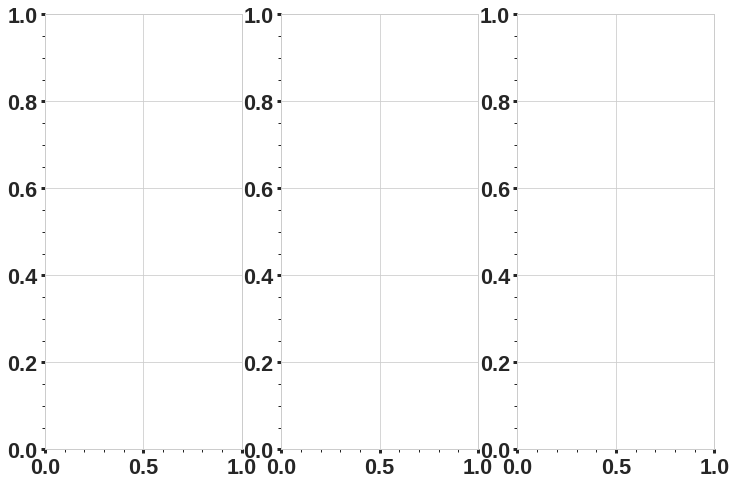

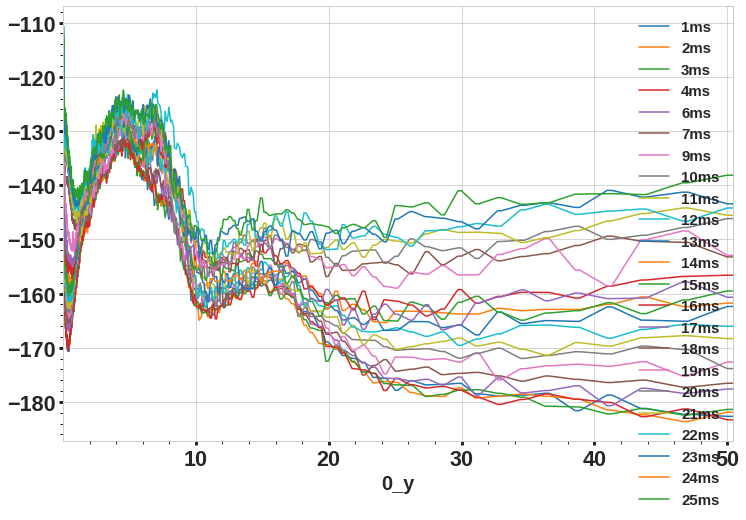

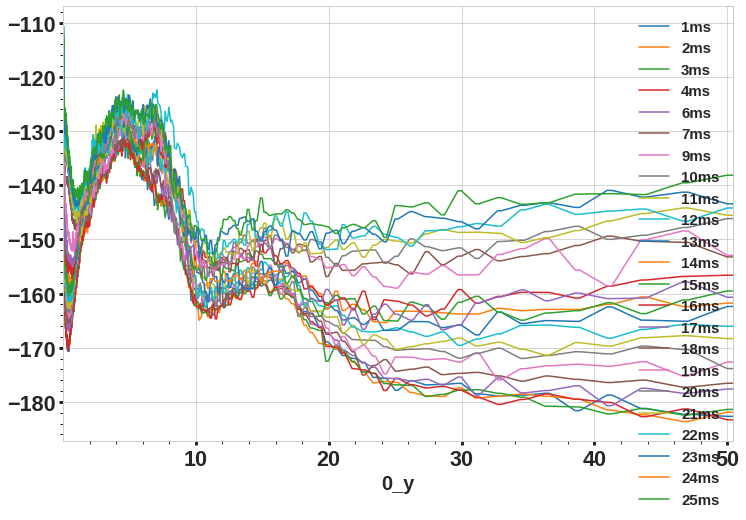

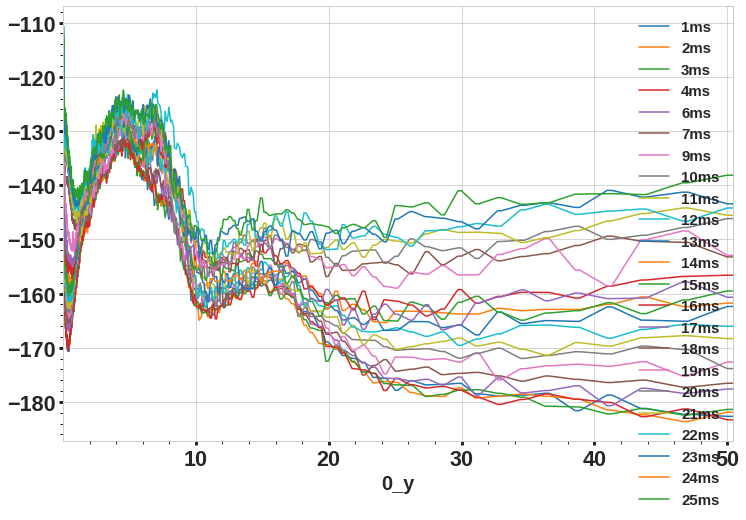

In [58]:
df_list = [df_HHZ ,df_HHE, df_HHN]
fig, axes = plt.subplots(1, 3)
# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        df_list[count].plot()

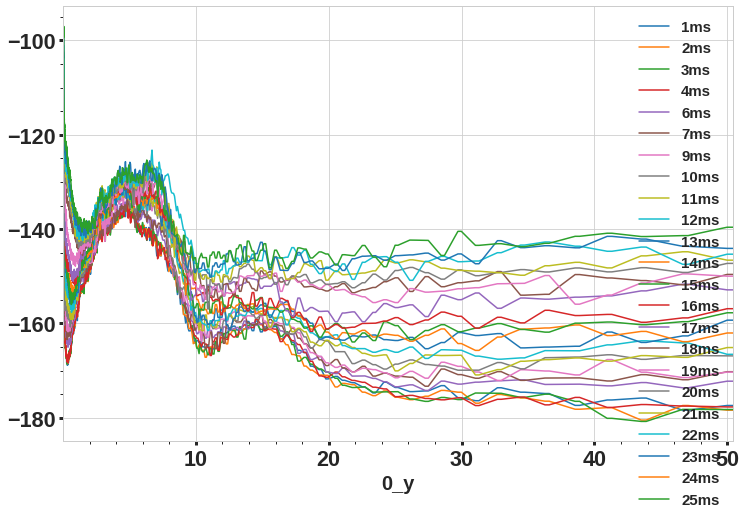

In [53]:
df_list[1].plot()

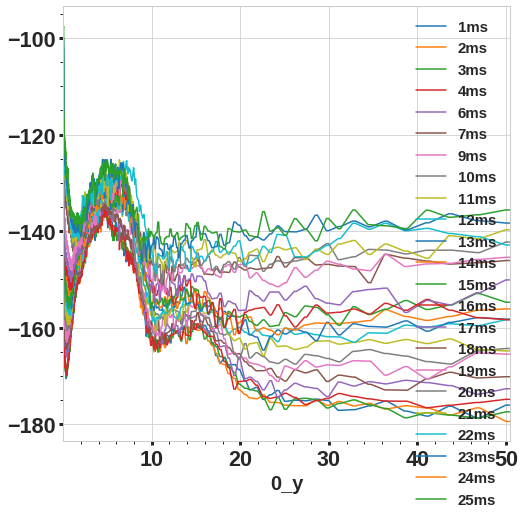

In [76]:

ax = df_HHN.plot()

f = plt.gcf()

f.get_axes()[0]

In [78]:
cax = f.get_axes()[0]
#and we can modify it, i.e.:
cax.set_ylabel('test')

Text(3.2, 0.5, 'test')

In [87]:
df_HHN.T.columns

Float64Index([                0.02,  0.02017403967580798, 0.020349593842053725,
               0.02052667567780848,  0.02070529847682755, 0.020885475648548275,
              0.021067220719096717, 0.021250547332303055, 0.021435469250725862,
              0.021622000356685274,
              ...
                 46.64478247963327,   47.050684620677735,   47.460118915574036,
                 47.87311610106778,    48.28970718137517,    48.70992343051061,
                  49.1337963946345,    49.56135789442137,   49.992640027448786,
                50.427675170606896],
             dtype='float64', name='0_y', length=905)

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

n_lines = 5
x, y, c = df_HHN

cmap = plt.get_cmap("jet", len(c))
norm = matplotlib.colors.BoundaryNorm(np.arange(len(c)+1)+0.5,len(c))
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])  # this line may be ommitted for matplotlib >= 3.1

fig, ax = plt.subplots(dpi=100)
for i, yi in enumerate(y.T):
    ax.plot(x, yi, c=cmap(i))
fig.colorbar(sm, ticks=c)
plt.show()

ValueError: too many values to unpack (expected 3)

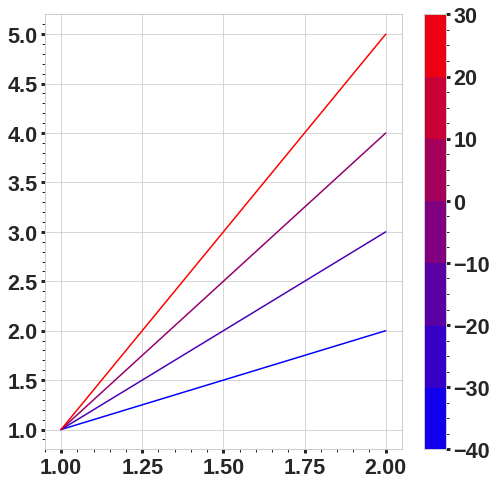

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt

min, max = (-40, 30)
step = 10

# Setting up a colormap that's a simple transtion
mymap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])

# Using contourf to provide my colorbar info, then clearing the figure
Z = [[0,0],[0,0]]
levels = range(min,max+step,step)
CS3 = plt.contourf(Z, levels, cmap=mymap)
plt.clf()

# Plotting what I actually want
X=[[1,2],[1,2],[1,2],[1,2]]
Y=[[1,2],[1,3],[1,4],[1,5]]
Z=[-40,-20,0,30]
for x,y,z in zip(X,Y,Z):
    # setting rgb color based on z normalized to my range
    r = (float(z)-min)/(max-min)
    g = 0
    b = 1-r
    plt.plot(x,y,color=(r,g,b))
plt.colorbar(CS3) # using the colorbar info I got from contourf
plt.show()

In [66]:
df_HHN.columns

Index(['1ms', '2ms', '3ms', '4ms', '6ms', '7ms', '9ms', '10ms', '11ms', '12ms',
       '13ms', '14ms', '15ms', '16ms', '17ms', '18ms', '19ms', '20ms', '21ms',
       '22ms', '23ms', '24ms', '25ms'],
      dtype='object')

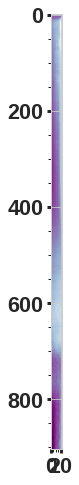

In [65]:
plt.rcParams['figure.figsize'] = 8, 8

plt.imshow(df_HHZ, cmap=plt.cm.BuPu_r)

Text(0.5, 1.0, '2017 ELIS HHN Wind Noise')

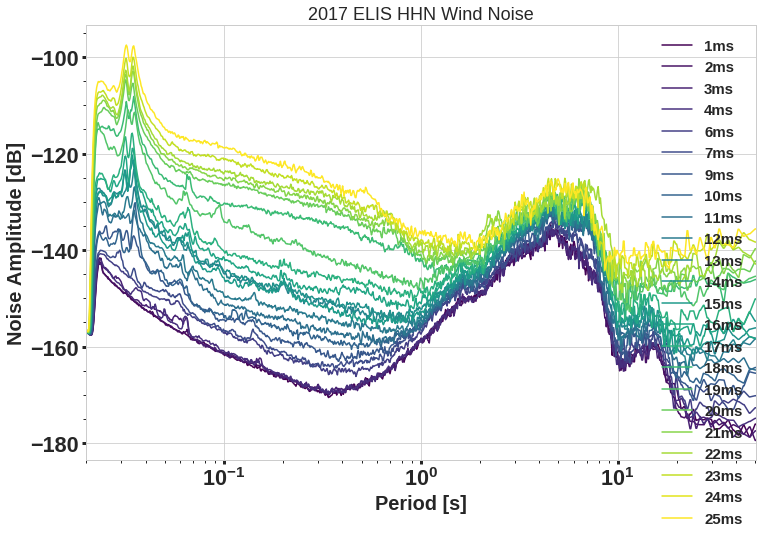

In [25]:
df_HHN.plot(colormap='viridis')
plt.semilogx()

plt.ylabel('Noise Amplitude [dB]')
plt.xlabel('Period [s]')
plt.title('2017 ELIS HHN Wind Noise')